In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler,scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/content/23AIML037 MODI KASHAK SARJU - Player.csv')
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.dropna(inplace=True)

In [29]:
df.League.value_counts()

,count
League,
A,139
N,124


In [6]:
dummy=pd.get_dummies(df[['League','Division','NewLeague']])

In [7]:
dummy.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [8]:
XTemp=df.drop(['League','Division','NewLeague','Salary'],axis=1)
X=pd.concat([XTemp,dummy[['League_N','Division_W','NewLeague_N']]],axis=1)
y=df['Salary']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AtBat        263 non-null    int64
 1   Hits         263 non-null    int64
 2   HmRun        263 non-null    int64
 3   Runs         263 non-null    int64
 4   RBI          263 non-null    int64
 5   Walks        263 non-null    int64
 6   Years        263 non-null    int64
 7   CAtBat       263 non-null    int64
 8   CHits        263 non-null    int64
 9   CHmRun       263 non-null    int64
 10  CRuns        263 non-null    int64
 11  CRBI         263 non-null    int64
 12  CWalks       263 non-null    int64
 13  PutOuts      263 non-null    int64
 14  Assists      263 non-null    int64
 15  Errors       263 non-null    int64
 16  League_N     263 non-null    bool 
 17  Division_W   263 non-null    bool 
 18  NewLeague_N  263 non-null    bool 
dtypes: bool(3), int64(16)
memory usage: 35.7 KB


In [32]:
lr=LinearRegression()
scaler=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
lr.fit(scaler.fit_transform(X_train),y_train)
y_pred=lr.predict(scaler.fit_transform(X_test))

In [33]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 118684.12936656976
R2 Score: 0.40550372028629356


In [34]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    bool 
 1   League_N     263 non-null    bool 
 2   Division_E   263 non-null    bool 
 3   Division_W   263 non-null    bool 
 4   NewLeague_A  263 non-null    bool 
 5   NewLeague_N  263 non-null    bool 
dtypes: bool(6)
memory usage: 3.6 KB


In [35]:
alphas=10**np.linspace(10,-2,100)*0.00001
ridge=Ridge()
coeffs=[]

In [36]:
scaler=StandardScaler()
for a in alphas:
  ridge.set_params(alpha=a)
  ridge.fit(scaler.fit_transform(X),y)
  coeffs.append(ridge.coef_)
np.shape(coeffs)

(100, 19)

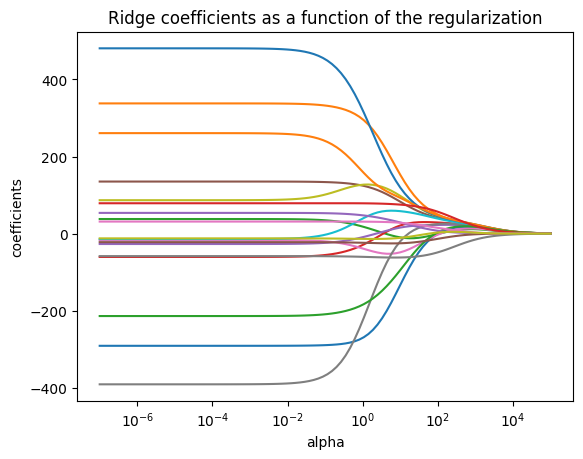

In [37]:
ax=plt.gca()
ax.plot(alphas,coeffs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [39]:
#pd.set_option('precision', 6)
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=1)

In [40]:
def Ridge_Regression(alpha):
  scaler=StandardScaler()
  ridge=Ridge(alpha=alpha)
  ridge.fit(scaler.fit_transform(X_train),y_train)
  pred=ridge.predict(scaler.transform(X_test))
  print(pd.Series(ridge.coef_,index=X.columns))
  print(mean_squared_error(y_test,pred))

In [41]:

Ridge_Regression(0)

AtBat          -266.553048
Hits            197.706218
HmRun           -38.103182
Runs             -1.007996
RBI             103.119845
Walks            79.750209
Years            45.357697
CAtBat        -1399.811384
CHits          1426.954812
CHmRun          264.037977
CRuns            86.858781
CRBI           -211.142393
CWalks           42.533597
PutOuts         126.075563
Assists          65.816094
Errors          -38.313885
League_N         66.822855
Division_W      -56.870280
NewLeague_N     -40.962688
dtype: float64
116690.46856660892


In [42]:
scaler=StandardScaler()
ridgecv=RidgeCV(alphas=alphas)
ridgecv.fit(scaler.fit_transform(X_train),y_train)
ridgecv.alpha_

np.float64(70.54802310718645)

#Hyperparameter tuning for lambda

In [43]:
scaler=StandardScaler()
ridgecv=RidgeCV(alphas=alphas,cv=5)
ridgecv.fit(scaler.fit_transform(X_train),y_train)
ridgecv.alpha_

np.float64(93.26033468832199)

In [44]:
scaler=StandardScaler()
opt_ridge=Ridge(alpha=ridgecv.alpha_)
opt_ridge.fit(scaler.fit_transform(X_train),y_train)
pred=opt_ridge.predict(scaler.transform(X_test))
mean_squared_error(y_test,pred)

99629.60749364503

In [45]:
print(r2_score(y_test,pred))

0.4235103513302778


In [46]:
y.mean()

np.float64(535.9258821292775)

In [47]:
opt_ridge.fit(X,y)
pd.Series(opt_ridge.coef_,index=X.columns)

,0
AtBat,-2.112570
Hits,7.654016
HmRun,2.940899
Runs,-2.102478
RBI,-0.384021
Walks,6.105964
Years,-2.371648
CAtBat,-0.176494
CHits,0.091591
CHmRun,-0.202627


In [49]:
lasso=Lasso(max_iter=10000)
coef=[]
scaler=StandardScaler()
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(scaler.fit_transform(X_train),y_train)
  coef.append(lasso.coef_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.070e+03, tolerance: 3.050e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.994e+03, tolerance: 3.050e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+04, tolerance: 3.050e

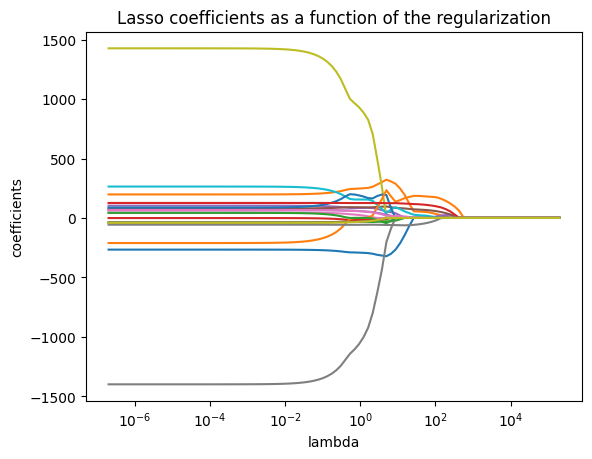

In [50]:
ax=plt.gca()
ax.plot(alphas*2,coef)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

In [51]:
lassocv=LassoCV(alphas=alphas, cv=10, max_iter=100000)
lassocv.fit(scaler.fit_transform(X_train),y_train)
LassoCV(cv=10,max_iter=100000)
lassocv.alpha_

np.float64(23.101297000831583)

In [52]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scaler.fit_transform(X_train),y_train)
mean_squared_error(y_test,lasso.predict(scaler.fit_transform(X_test)))

106476.00091588566

In [53]:
pd.Series(lasso.coef_, index=X.columns)

,0
AtBat,-0.000000
Hits,51.830423
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,68.432215
Years,0.000000
CAtBat,0.000000
CHits,0.000000
CHmRun,21.155357


In [54]:
pd.Series(lasso.coef_[lasso.coef_ !=0], index=X.columns[lasso.coef_ !=0])

,0
Hits,51.830423
Walks,68.432215
CHmRun,21.155357
CRBI,183.100422
PutOuts,112.455069
Division_W,-48.777661


In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


print(pca.explained_variance_ratio_)


print(np.cumsum(pca.explained_variance_ratio_))


[3.83142396e-01 2.18410758e-01 1.06863592e-01 8.19251975e-02
 5.25608081e-02 4.34450422e-02 3.62810828e-02 2.70015556e-02
 1.31964802e-02 9.72721749e-03 7.22341252e-03 6.70946072e-03
 5.03086617e-03 3.21246472e-03 2.73557843e-03 1.47396692e-03
 7.41715623e-04 2.55915858e-04 6.24891919e-05]
[0.3831424  0.60155315 0.70841675 0.79034194 0.84290275 0.88634779
 0.92262888 0.94963043 0.96282691 0.97255413 0.97977754 0.986487
 0.99151787 0.99473033 0.99746591 0.99893988 0.99968159 0.99993751
 1.        ]


In [57]:
pca_t = PCA()
X_train_reduced_pca = pca_t.fit_transform(scale(X_train))
n = len(X_train_reduced_pca)
kfold10 = KFold(n_splits=10)
lm_regr = LinearRegression()
mse = []

In [58]:
tr_score = -1*cross_val_score(lm_regr, np.ones((n,1)),y_train, cv=kfold10,scoring='neg_mean_squared_error').mean()
mse.append(tr_score)
for i in np.arange(1, 20):
    tr_score = -1*cross_val_score(lm_regr, X_train_reduced_pca[:,:i],
    y_train, cv=kfold10, scoring='neg_mean_squared_error').mean()
    mse.append(tr_score)

[]

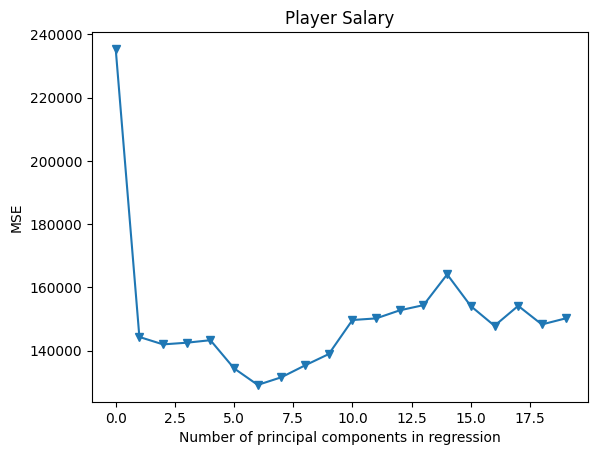

In [ ]:
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Player Salary')
plt.xlim(xmin=-1)
plt.plot()